In [1]:
include("../src/dependencies.jl");
pyplot();

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = top-level scope at none:0
└ @ Core none:0


In [2]:
function Compute(eps,mu)
    # PREPARATION
    param = ( N  = 2^14,
              L  = 15,
              T  = 2/eps,
              dt = 0.001,
                nr = Int(20/eps)
        )
    init = BellCurve(merge(param,(θ=2,)))
    problems = []
    push!(problems,Problem(Boussinesq(merge(param,(ϵ=eps,μ=mu,a=0,b=0))), init, param));
    push!(problems,Problem(WaterWaves(merge(param,(ϵ=eps,μ=mu))), init, param));
    
    for problem in problems
        print("\nNow solving the model ",problem.model.label,"\n")
        solve!( problem )
        sleep(0.1)
    end
    return problems
end
function Plot(problems)
    plt = plot(layout=(2,1))
    for problem in problems
        fig_problem!( plt, problem )
    end
    display(plt)
end   
function Anim(problems)    
    n = length(problems[1].data.U) # number of frames
    prog = Progress(n,1) # progress bar
    @gif for l in range(1,step=1,stop=n)
        p=plot();
        for pb in problems
            if typeof(pb.model)==WaterWaves
                (x,z,v) = mapfro(pb.model,pb.data.U[l])
                plot!(p, x, z;
                    title="",
                    label=pb.model.label)
            else
                (hr,ur) = mapfro(pb.model,pb.data.U[l])
                plot!(p, pb.mesh.x, hr;
                    title="",
                    label=pb.model.label)
            end
        end
        plot!(ylims=(-1,1.01));
        next!(prog)
    end
end

Anim (generic function with 1 method)

# Water waves vs Saint-Venant for (ϵ=1,μ=1/2)

┌ Warning: The fix point algorithm did not converge
└ @ Main /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/src/models/WaterWaves.jl:121
┌ Warning: Estimated error : 2.297098307126833e-16
└ @ Main /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/src/models/WaterWaves.jl:122



Now solving the model Saint-Venant
problem.param = (N = 16384, L = 15, T = 2.0, dt = 0.001, nr = 20)


Progress:  98%|████████████████████████████████████████ |  ETA: 0:00:01

Progress: 100%|█████████████████████████████████████████| Time: 0:00:40



Now solving the model water waves
problem.param = (N = 16384, L = 15, T = 2.0, dt = 0.001, nr = 20)


Progress:  99%|█████████████████████████████████████████|  ETA: 0:00:01

Progress: 100%|█████████████████████████████████████████| Time: 0:01:58
┌ Warning: `getindex(f::Figure, x)` is deprecated, use `getproperty(f, x)` instead.
│   caller = _before_layout_calcs(::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:875
└ @ Plots /Users/vduchene/.julia/packages/Plots/rmogG/src/backends/pyplot.jl:875
┌ Warning: `getindex(f::Figure, x)` is deprecated, use `getproperty(f, x)` instead.
│   caller = _before_layout_calcs(::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:877
└ @ Plots /Users/vduchene/.julia/packages/Plots/rmogG/src/backends/pyplot.jl:877
┌ Warning: `getindex(f::Figure, x)` is deprecated, use `getproperty(f, x)` instead.
│   caller = _before_layout_calcs(::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:878
└ @ Plots /Users/vduchene/.julia/packages/Plots/rmogG/src/backends/pyplot.jl:878
┌ Warning: `getindex(f::Figure, x)` is deprecated, use `getproperty(f, x)` instead.
│   caller = _before_layout_calcs(::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:879
└ @ P

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = macro expansion at logging.jl:307 [inlined]
└ @ Core ./logging.jl:307
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = py_set_lims(::PyCall.PyObject, ::Plots.Axis) at pyplot.jl:784
└ @ Plots /Users/vduchene/.julia/packages/Plots/rmogG/src/backends/pyplot.jl:784
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = py_set_ticks(::PyCall.PyObject, ::Tuple{Array{Float64,1},Array{String,1}}, ::Symbol) at pyplot.jl:789
└ @ Plots /Users/vduchene/.julia/packages/Plots/rmogG/src/backends/pyplot.jl:789
┌ Warning: `getindex(o::PyObject, s::Symbol)` 

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = py_add_legend(::Plots.Plot{Plots.PyPlotBackend}, ::Plots.Subplot{Plots.PyPlotBackend}, ::PyCall.PyObject) at pyplot.jl:1194
└ @ Plots /Users/vduchene/.julia/packages/Plots/rmogG/src/backends/pyplot.jl:1194
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = py_add_legend(::Plots.Plot{Plots.PyPlotBackend}, ::Plots.Subplot{Plots.PyPlotBackend}, ::PyCall.PyObject) at pyplot.jl:1211
└ @ Plots /Users/vduchene/.julia/packages/Plots/rmogG/src/backends/pyplot.jl:1211
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = py_add_legend(::Plots.Plot{Plo

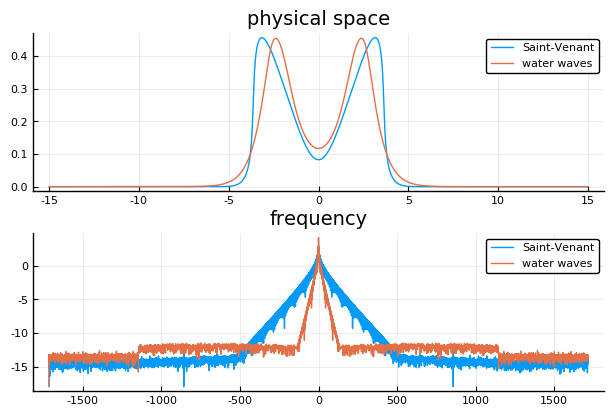

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = _update_plot_object(::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:1244
└ @ Plots /Users/vduchene/.julia/packages/Plots/rmogG/src/backends/pyplot.jl:1244
┌ Warning: `getindex(f::Figure, x)` is deprecated, use `getproperty(f, x)` instead.
│   caller = _display(::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:1264
└ @ Plots /Users/vduchene/.julia/packages/Plots/rmogG/src/backends/pyplot.jl:1264


In [3]:
problems = Compute(1,1/2);
Plot(problems);

┌ Warning: `getindex(f::Figure, x)` is deprecated, use `getproperty(f, x)` instead.
│   caller = _show(::IOStream, ::MIME{Symbol("image/png")}, ::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:1282
└ @ Plots /Users/vduchene/.julia/packages/Plots/rmogG/src/backends/pyplot.jl:1282
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = _show(::IOStream, ::MIME{Symbol("image/png")}, ::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:1282
└ @ Plots /Users/vduchene/.julia/packages/Plots/rmogG/src/backends/pyplot.jl:1282
┌ Warning: `getindex(f::Figure, x)` is deprecated, use `getproperty(f, x)` instead.
│   caller = _show(::IOStream, ::MIME{Symbol("image/png")}, ::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:1282
└ @ Plots /Users/vduchene/.julia/packages/Plots/rmogG/src/backends/pyplot.jl:1282
Progress: 100%|█████████████████████████████████████████| Time: 0:00:32


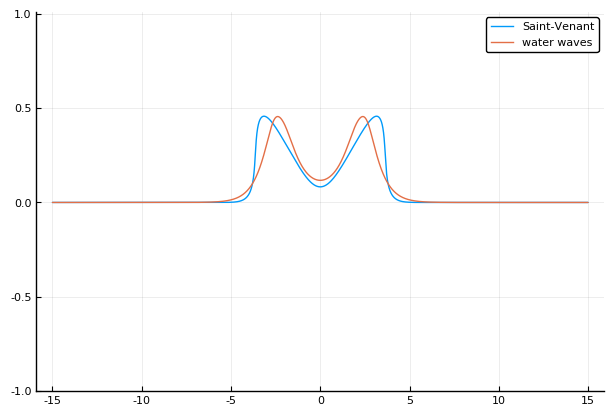

┌ Info: Saved animation to 
│   fn = /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/notebooks/tmp.gif
└ @ Plots /Users/vduchene/.julia/packages/Plots/rmogG/src/animation.jl:90


Plots.AnimatedGif("/Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/notebooks/tmp.gif")

In [4]:
Anim(problems)

# Water waves vs Saint-Venant for (ϵ=1,μ=1/10)


Now solving the model Saint-Venant
problem.param = (N = 16384, L = 15, T = 2.0, dt = 0.001, nr = 20)


┌ Warning: The fix point algorithm did not converge
└ @ Main /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/src/models/WaterWaves.jl:121
┌ Warning: Estimated error : 2.1966660518627966e-16
└ @ Main /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/src/models/WaterWaves.jl:122
Progress:  99%|█████████████████████████████████████████|  ETA: 0:00:00

Progress: 100%|█████████████████████████████████████████| Time: 0:00:37



Now solving the model water waves
problem.param = (N = 16384, L = 15, T = 2.0, dt = 0.001, nr = 20)


Progress:  99%|█████████████████████████████████████████|  ETA: 0:00:01

Progress: 100%|█████████████████████████████████████████| Time: 0:02:00


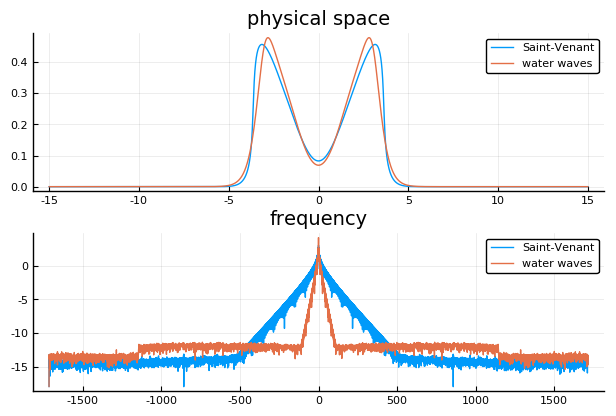

In [5]:
problems = Compute(1,1/10)
Plot(problems)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:31


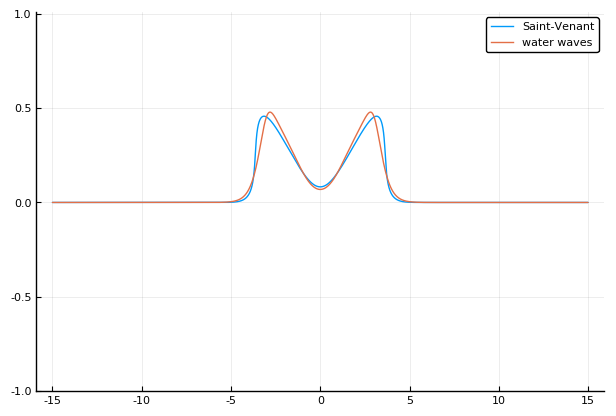

┌ Info: Saved animation to 
│   fn = /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/notebooks/tmp.gif
└ @ Plots /Users/vduchene/.julia/packages/Plots/rmogG/src/animation.jl:90


Plots.AnimatedGif("/Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/notebooks/tmp.gif")

In [6]:
Anim(problems)

# Water waves vs Saint-Venant for (ϵ=1,μ=1/100)


Now solving the model Saint-Venant
problem.param = (N = 16384, L = 15, T = 2.0, dt = 0.001, nr = 20)


┌ Warning: The fix point algorithm converged in 23 iterations
└ @ Main /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/src/models/WaterWaves.jl:124
Progress:  99%|█████████████████████████████████████████|  ETA: 0:00:00

Progress: 100%|█████████████████████████████████████████| Time: 0:00:37



Now solving the model water waves
problem.param = (N = 16384, L = 15, T = 2.0, dt = 0.001, nr = 20)


Progress:  99%|█████████████████████████████████████████|  ETA: 0:00:01

Progress: 100%|█████████████████████████████████████████| Time: 0:01:59


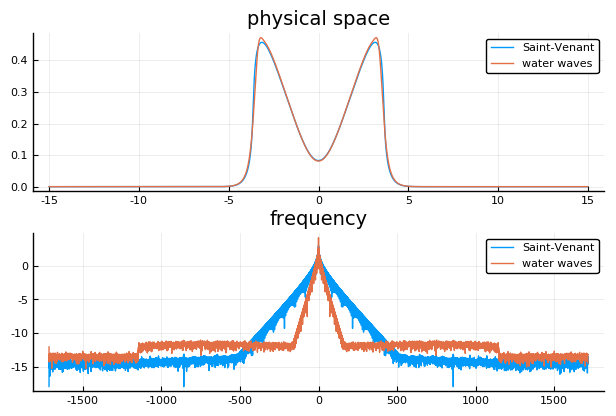

In [7]:
problems = Compute(1,1/100)
Plot(problems)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:31


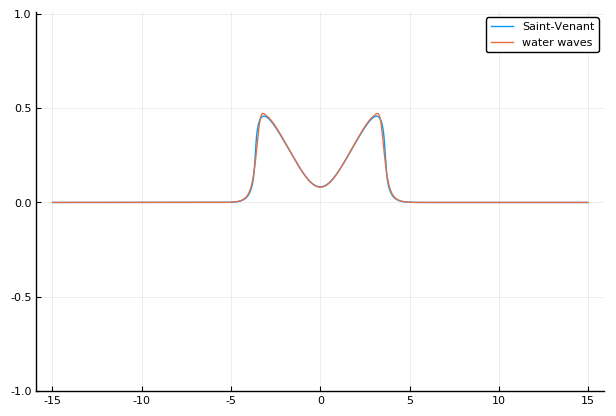

┌ Info: Saved animation to 
│   fn = /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/notebooks/tmp.gif
└ @ Plots /Users/vduchene/.julia/packages/Plots/rmogG/src/animation.jl:90


Plots.AnimatedGif("/Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/notebooks/tmp.gif")

In [8]:
Anim(problems)

# Water waves vs Saint-Venant for (ϵ=1/5,μ=1/10)


Now solving the model Saint-Venant
problem.param = (N = 16384, L = 15, T = 10.0, dt = 0.001, nr = 100)


┌ Warning: The fix point algorithm did not converge
└ @ Main /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/src/models/WaterWaves.jl:121
┌ Warning: Estimated error : 2.295226268872046e-16
└ @ Main /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/src/models/WaterWaves.jl:122
Progress:  99%|█████████████████████████████████████████|  ETA: 0:00:02

Progress: 100%|█████████████████████████████████████████| Time: 0:03:07



Now solving the model water waves
problem.param = (N = 16384, L = 15, T = 10.0, dt = 0.001, nr = 100)


Progress:  99%|█████████████████████████████████████████|  ETA: 0:00:06

Progress: 100%|█████████████████████████████████████████| Time: 0:09:55


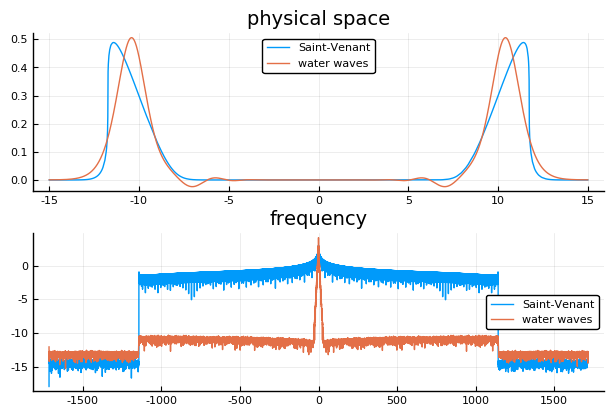

In [9]:
problems = Compute(1/5,1/10)
Plot(problems)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:31


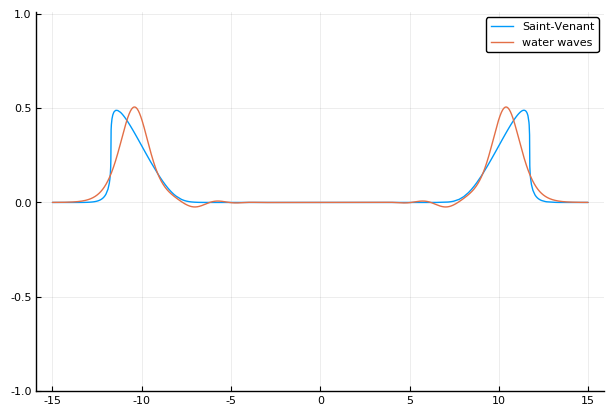

┌ Info: Saved animation to 
│   fn = /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/notebooks/tmp.gif
└ @ Plots /Users/vduchene/.julia/packages/Plots/rmogG/src/animation.jl:90


Plots.AnimatedGif("/Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/notebooks/tmp.gif")

In [10]:
Anim(problems)

# Water waves vs Saint-Venant for (ϵ=1/5,μ=1/100)


Now solving the model Saint-Venant
problem.param = (N = 16384, L = 15, T = 10.0, dt = 0.001, nr = 100)


┌ Warning: The fix point algorithm converged in 14 iterations
└ @ Main /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/src/models/WaterWaves.jl:124
Progress:  99%|█████████████████████████████████████████|  ETA: 0:00:02

Progress: 100%|█████████████████████████████████████████| Time: 0:03:04



Now solving the model water waves
problem.param = (N = 16384, L = 15, T = 10.0, dt = 0.001, nr = 100)


Progress:  99%|█████████████████████████████████████████|  ETA: 0:00:06

Progress: 100%|█████████████████████████████████████████| Time: 0:09:54


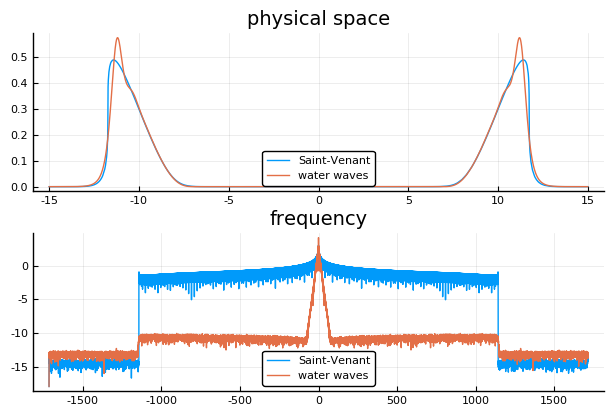

In [11]:
problems = Compute(1/5,1/100)
Plot(problems)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:31


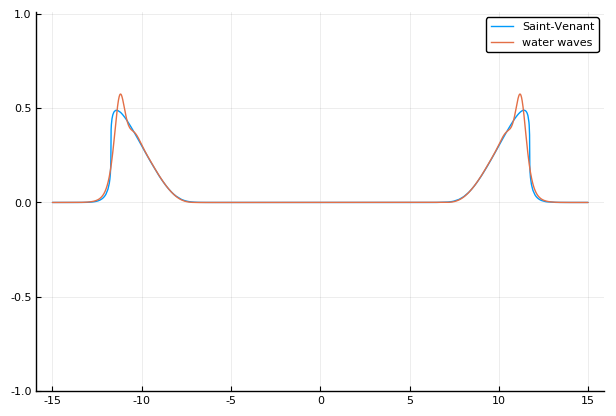

┌ Info: Saved animation to 
│   fn = /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/notebooks/tmp.gif
└ @ Plots /Users/vduchene/.julia/packages/Plots/rmogG/src/animation.jl:90


Plots.AnimatedGif("/Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/notebooks/tmp.gif")

In [12]:
Anim(problems)